# Bike Sharing Dataset

In [1]:
# Load required packages

# Linear algebra and data processing
import numpy as np 
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing_dataset = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing_dataset.data.features 
y = bike_sharing_dataset.data.targets 
  
# metadata 
# print(bike_sharing_dataset.metadata) 
  
# variable information 
# print(bike_sharing_dataset.variables) 


In [3]:
# Process the date and hour column and convert it to a time stamp
Xm, ym = X, y
Xm['dteday'] = pd.to_datetime(X['dteday'])
Xm['datetime'] = Xm['dteday'] + pd.to_timedelta(Xm['hr'], unit = 'h')
Xm = Xm.drop(['dteday'], axis = 1)
Xm.set_index('datetime', inplace = True)
ym.set_index(X['datetime'], inplace = True)

# Merged data
data = pd.merge(Xm,ym, left_index=True, right_index=True)
data.head()

<ipython-input-3-ae33c01c4241>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xm['dteday'] = pd.to_datetime(X['dteday'])
<ipython-input-3-ae33c01c4241>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xm['datetime'] = Xm['dteday'] + pd.to_timedelta(Xm['hr'], unit = 'h')


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [4]:
Xm.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700


Text(0, 0.5, 'cnt')

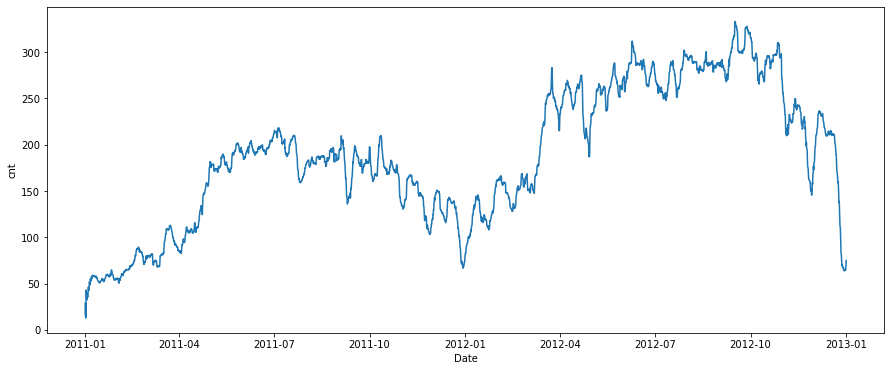

In [5]:
# See the variation of count of total rental bikes with time
plt.figure(figsize =(15,6))
plt.plot(ym['cnt'].rolling(window='7d').mean())
plt.xlabel('Date')
plt.ylabel('cnt')

Text(0, 0.5, 'cnt')

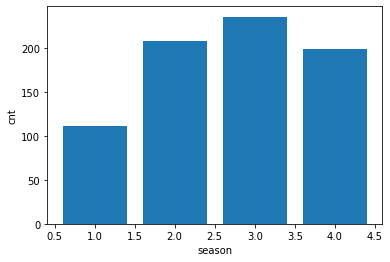

In [6]:
# See the variation of count of rental bikes for each season
season_bikes = data.groupby('season')['cnt'].mean()
plt.bar(season_bikes.index, season_bikes.values)
plt.xlabel('season')
plt.ylabel('cnt')

Text(0, 0.5, 'cnt')

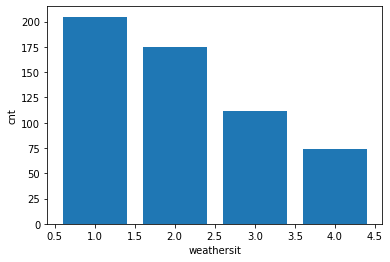

In [7]:
# See the variation of count of rental bikes for each weather condition
weather_bikes = data.groupby('weathersit')['cnt'].mean()
plt.bar(weather_bikes.index, weather_bikes.values)
plt.xlabel('weathersit')
plt.ylabel('cnt')

Text(0, 0.5, 'cnt')

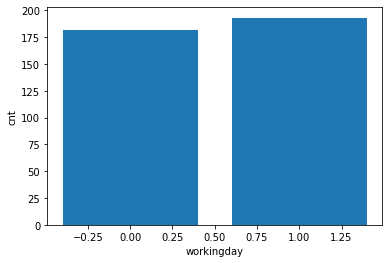

In [8]:
# See the variation of count of rental bikes with working day
holiday_bikes = data.groupby('workingday')['cnt'].mean()
plt.bar(holiday_bikes.index, holiday_bikes.values)
plt.xlabel('workingday')
plt.ylabel('cnt')

Text(0, 0.5, 'cnt')

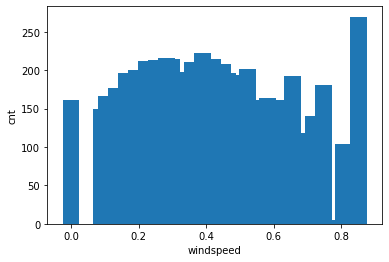

In [9]:
# See the variation of count of total rental bikes with windspeed
wind_grouped = data.groupby('windspeed')['cnt'].mean()
plt.bar(wind_grouped.index, wind_grouped.values, width=0.05)
plt.xlabel('windspeed')
plt.ylabel('cnt')

Text(0, 0.5, 'cnt')

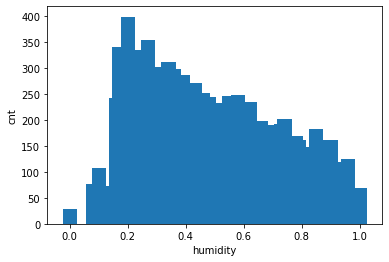

In [10]:
# See the variation of count of total rental bikes with humidity
hum_grouped = data.groupby('hum')['cnt'].mean()
plt.bar(hum_grouped.index, hum_grouped.values, width=0.05)
plt.xlabel('humidity')
plt.ylabel('cnt')

In [11]:
# Split the data into training (1 year 8 months data) and test (last 4 months of the data)

Xtrain = Xm[Xm.index <= '2012-08-31'].drop(['holiday', 'weekday', 'workingday', 'atemp'], axis=1)
Xtest= Xm[Xm.index > '2012-08-31'].drop(['holiday', 'weekday', 'workingday', 'atemp'], axis=1)
ytrain, ytest = ym[ym.index <= '2012-08-31'], ym[ym.index > '2012-08-31']

In [12]:
Xtrain.head()

,season,yr,mnth,hr,weathersit,temp,hum,windspeed
datetime,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,1,0.24,0.81,0.0
2011-01-01 01:00:00,1,0,1,1,1,0.22,0.80,0.0
2011-01-01 02:00:00,1,0,1,2,1,0.22,0.80,0.0
2011-01-01 03:00:00,1,0,1,3,1,0.24,0.75,0.0
2011-01-01 04:00:00,1,0,1,4,1,0.24,0.75,0.0


## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
# Initialize
l_reg = LinearRegression()

# Fit the model
l_reg.fit(Xtrain, ytrain)

# Check relations
l_reg.coef_

array([[   7.88239366,   77.44615872,    2.78513808,    7.44393329,
          -3.19252176,  273.7851143 , -176.43557277,   27.58697987]])

In [14]:
# Predict
l_pred = l_reg.predict(Xtest)
# Make the predictions in the right format
l_pred = pd.DataFrame({'datetime': ytest.index, 'cnt': l_pred.reshape(-1)}).set_index('datetime')

In [15]:
from sklearn.metrics import mean_absolute_percentage_error
# Error estimation

l_err = mean_absolute_percentage_error(ytest['cnt'].rolling('7d').mean(), l_pred['cnt'].rolling('7d').mean())

print('Linear Regression MAPE:', l_err)

Linear Regression MAPE: 0.1893769784033425


Text(0, 0.5, 'cnt')

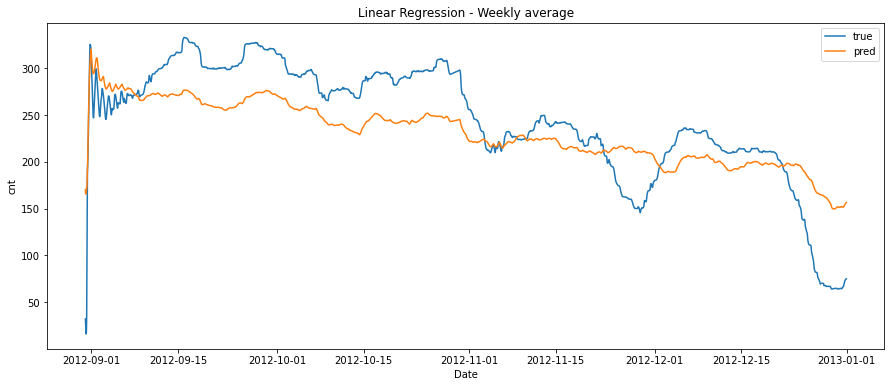

In [16]:
plt.figure(figsize=(15,6))
plt.plot(ytest['cnt'].rolling('7d').mean(), label = 'true')
plt.plot(l_pred['cnt'].rolling('7d').mean(), label= 'pred')
plt.legend(loc='upper right')
plt.title('Linear Regression - Weekly average')
plt.xlabel('Date')
plt.ylabel('cnt')

## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt_reg = DecisionTreeRegressor(random_state = 42)

# Fit the model
dt_reg.fit(X=Xtrain, y=ytrain)

# Make predictions
dt_pred = dt_reg.predict(Xtest)
# Make the predictions in the right format
dt_pred = pd.DataFrame({'datetime': ytest.index, 'cnt': dt_pred}).set_index('datetime')

In [18]:
# Error estimation

dt_err = mean_absolute_percentage_error(ytest['cnt'].rolling('7d').mean(), dt_pred['cnt'].rolling('7d').mean())

print('Decision Tree MAPE:', dt_err)

Decision Tree MAPE: 0.12190737779257615


Text(0, 0.5, 'cnt')

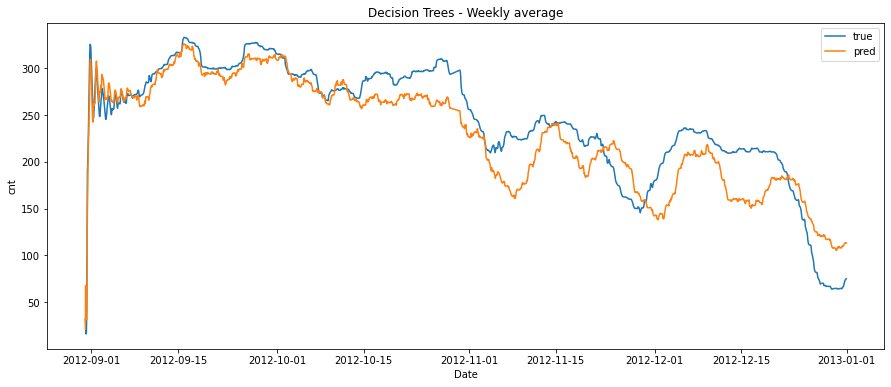

In [19]:
plt.figure(figsize=(15,6))
plt.plot(ytest['cnt'].rolling('7d').mean(), label = 'true')
plt.plot(dt_pred['cnt'].rolling('7d').mean(), label= 'pred')
plt.legend(loc='upper right')
plt.title('Decision Trees - Weekly average')
plt.xlabel('Date')
plt.ylabel('cnt')

## Random Forests

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_reg = RandomForestRegressor(random_state=42)

# Fit the model
rf_reg.fit(Xtrain, ytrain.values.reshape(-1))

# Predictions
rf_pred = rf_reg.predict(Xtest)
# Make the predictions in the right format
rf_pred = pd.DataFrame({'datetime': ytest.index, 'cnt': rf_pred}).set_index('datetime')

In [21]:
# Error estimation
rf_err = mean_absolute_percentage_error(ytest['cnt'].rolling('7d').mean(), rf_pred['cnt'].rolling('7d').mean())

print('Random Forests MAPE:', rf_err)


Random Forests MAPE: 0.13395874264427687


Text(0, 0.5, 'cnt')

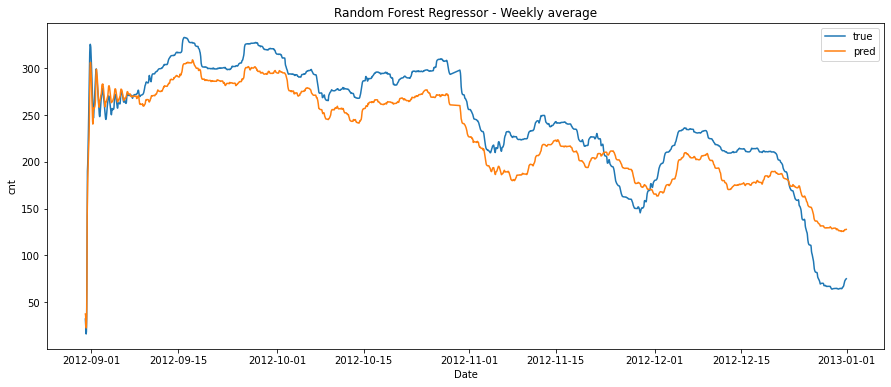

In [22]:
plt.figure(figsize=(15,6))
plt.plot(ytest['cnt'].rolling('7d').mean(), label = 'true')
plt.plot(rf_pred['cnt'].rolling('7d').mean(), label= 'pred')
plt.legend(loc='upper right')
plt.title('Random Forest Regressor - Weekly average')
plt.xlabel('Date')
plt.ylabel('cnt')

## Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Intialize 
gb_reg = GradientBoostingRegressor(random_state=42, max_depth=None)

# Fit
gb_reg.fit(Xtrain, ytrain.values.reshape(-1))

# predict
gb_pred = gb_reg.predict(Xtest)
# make predictions in the right format
gb_pred = pd.DataFrame({'datetime': ytest.index, 'cnt': gb_pred}).set_index('datetime')

In [24]:
# Error estimation

gb_err = mean_absolute_percentage_error(ytest['cnt'].rolling('7d').mean(), gb_pred['cnt'].rolling('7d').mean())

print('Gradient Boosting MAPE:', gb_err)

Gradient Boosting MAPE: 0.12130754667640949


Text(0, 0.5, 'cnt')

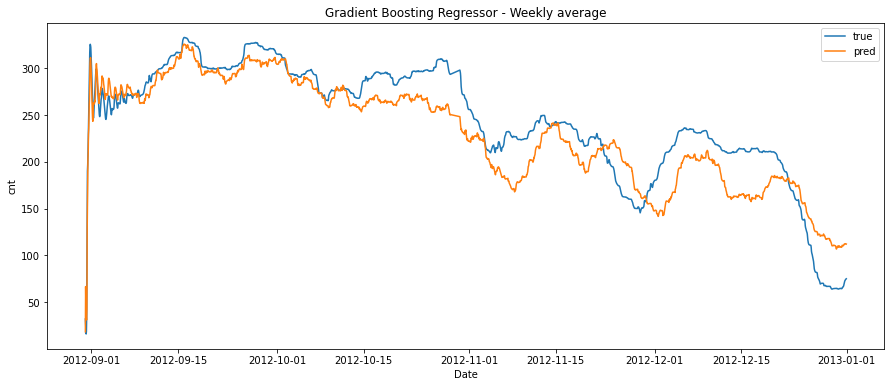

In [25]:
plt.figure(figsize=(15,6))
plt.plot(ytest['cnt'].rolling('7d').mean(), label = 'true')
plt.plot(gb_pred['cnt'].rolling('7d').mean(), label= 'pred')
plt.legend(loc='upper right')
plt.title('Gradient Boosting Regressor - Weekly average')
plt.xlabel('Date')
plt.ylabel('cnt')

## Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and fit model
nn_reg = KNeighborsRegressor(n_neighbors=10, weights='distance')

nn_reg.fit(Xtrain, ytrain.values.reshape(-1))

# Predict
nn_pred = nn_reg.predict(Xtest)
# Correct format
nn_pred = pd.DataFrame({'datetime': ytest.index, 'cnt': nn_pred}).set_index('datetime')

In [27]:
# Error estimation

nn_err = mean_absolute_percentage_error(ytest['cnt'].rolling('7d').mean(), nn_pred['cnt'].rolling('7d').mean())

print('Nearest Neighbors MAPE:', nn_err)

Nearest Neighbors MAPE: 0.2919022789894081


Text(0, 0.5, 'cnt')

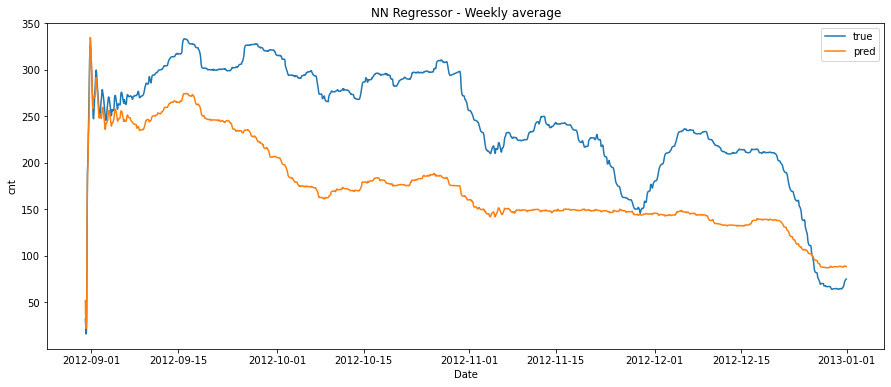

In [28]:
plt.figure(figsize=(15,6))
plt.plot(ytest['cnt'].rolling('7d').mean(), label = 'true')
plt.plot(nn_pred['cnt'].rolling('7d').mean(), label= 'pred')
plt.legend(loc='upper right')
plt.title('NN Regressor - Weekly average')
plt.xlabel('Date')
plt.ylabel('cnt')